# Python 3
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Define multiple Classification models
3. Fit the data to our models
4. Use our trained models to predict a class label 
5. Evaluate our models and chose the best performing model 



In [43]:
#Import Pandas to your workspace
import pandas as pd



In [44]:
#Read the "features.csv" file and store it into a variable
features = pd.read_csv("data/features.csv")



In [45]:
#Display the first few rows of the DataFrame
features.head()



,Store,Date,Temp,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month
0,1,2/5/2010,42.31,2.572,211.096358,8.106,False,2010,2
1,1,2/12/2010,38.51,2.548,211.242170,8.106,True,2010,2
2,1,2/19/2010,39.93,2.514,211.289143,8.106,False,2010,2
3,1,2/26/2010,46.63,2.561,211.319643,8.106,False,2010,2
4,1,3/5/2010,46.50,2.625,211.350143,8.106,False,2010,3


<h1>groupby()</h1>

<ul>
    <li>groupby combines 3 steps all in one function:
        <ol>
            <li>Split a DataFrame</li>
            <li>Apply a function</li>
            <li>Combine the results</li>
        </ol>
    </li>
    <li>groupby must be given the name of the column to group by as a string</li>
    <li>The column to apply the function onto must also be specified, as well as the function to apply</li>
</ul>

<img src="images/groupbyviz.jfif"/>

In [46]:
#Apply groupby to the Year and Month columns, calculating the mean of the CIP
year_CPI = features.groupby("Year")["CPI"].sum().reset_index()
year_CPI.head()



,Year,CPI
0,2010,363099.848068
1,2011,401416.975385
2,2012,411176.892813
3,2013,135870.737569


In [47]:
#Groupby returns a DataFrame, so we have access to all the same methods we saw earlier
year_CPI.sort_values(by = "Year", ascending = False, inplace = True)
year_CPI.head()



,Year,CPI
3,2013,135870.737569
2,2012,411176.892813
1,2011,401416.975385
0,2010,363099.848068


In [48]:
#Read the "stores.csv" file and store it into a variable called stores
stores = pd.read_csv("data/stores.csv")



In [49]:
#Display the first few rows of the stores DataFrame
stores.head()



,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [50]:
#Redefine the Type column to lower case
stores["Type"] = stores["Type"].str.lower()



In [51]:
#Display the first few rows to verify changes
stores.head()



,Store,Type,Size
0,1,a,151315
1,2,a,202307
2,3,b,37392
3,4,a,205863
4,5,b,34875


In [52]:
#Rename the Size column to 'Area'
stores.rename(columns={'Size': 'Area'}, inplace=True)



In [53]:
stores.head()



,Store,Type,Area
0,1,a,151315
1,2,a,202307
2,3,b,37392
3,4,a,205863
4,5,b,34875


<h1>merge()</h1>

<ul>
    <li>Merge two DataFrames along common columns</li>
    <li>Must be provided the DataFrame to merge with, as well as the names of the common columns</li>
    <li>Will merge and map rows where the values in both DataFrames are equal</li>
</ul>

<img src="images/mergetypes.png"/>

<img src="images/mergeinner.png"/>

In [54]:
features.head()



,Store,Date,Temp,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month
0,1,2/5/2010,42.31,2.572,211.096358,8.106,False,2010,2
1,1,2/12/2010,38.51,2.548,211.242170,8.106,True,2010,2
2,1,2/19/2010,39.93,2.514,211.289143,8.106,False,2010,2
3,1,2/26/2010,46.63,2.561,211.319643,8.106,False,2010,2
4,1,3/5/2010,46.50,2.625,211.350143,8.106,False,2010,3


In [55]:
stores.head()



,Store,Type,Area
0,1,a,151315
1,2,a,202307
2,3,b,37392
3,4,a,205863
4,5,b,34875


In [56]:
#Merge the stores DataFrame into the features DataFrame on the Stores column
df_merged = features.merge(stores, on = "Store")



In [57]:
#Display a few rows to verify changes
df_merged.head()



,Store,Date,Temp,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Type,Area
0,1,2/5/2010,42.31,2.572,211.096358,8.106,False,2010,2,a,151315
1,1,2/12/2010,38.51,2.548,211.242170,8.106,True,2010,2,a,151315
2,1,2/19/2010,39.93,2.514,211.289143,8.106,False,2010,2,a,151315
3,1,2/26/2010,46.63,2.561,211.319643,8.106,False,2010,2,a,151315
4,1,3/5/2010,46.50,2.625,211.350143,8.106,False,2010,3,a,151315


In [58]:
#Export the final version of our DataFrame to a .csv file named "final_data.csv" 
df_merged.to_csv('final_data.csv', index=False)


In [59]:
#Import libraries we will need

# numpy
import numpy

# scikit-learn
import sklearn

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import datasets

from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')



In [60]:
#2.2 Load Dataset
dataset = datasets.load_iris()
feature_names = dataset.feature_names
target_names = dataset.target_names
iris_data = pd.DataFrame(data=dataset.data, columns=feature_names)
target = pd.DataFrame(data=dataset.target, columns=['class'])

display(dataset)




{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [61]:
#3. Summarize The Dataset

#3.1 Dimensions of Dataset

print(iris_data.shape)



(150, 4)


In [62]:
#3.2 Peek at the Data

print(iris_data.head(20))



    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [63]:
#3.3 Statistical Summary

print(iris_data.describe())



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [64]:
#3.4 Class Distribution
#value_counts function to see number of each class
target['class'].value_counts()



2    50
1    50
0    50
Name: class, dtype: int64

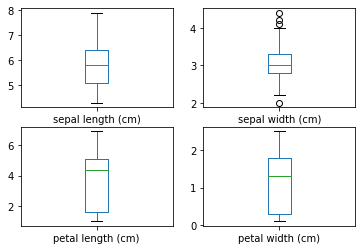

In [65]:
#4. Data Visualization
#Using the plot() function, we can make boxplots by simply specifying the kind of plot

iris_data.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False)
plt.show()



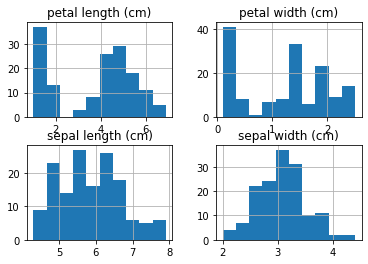

In [66]:
# histograms
iris_data.hist()
plt.show()



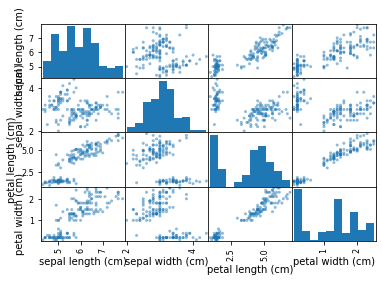

In [67]:
#4.2 Multivariate Plots

# scatter plot matrix
scatter_matrix(iris_data)
plt.show()



In [68]:
#Create the Train and Test set



#We use train_test_split to shuffle and divide our data into our train and test sets
X = iris_data[feature_names].values
Y = target.values
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=validation_size, 
                                                                    random_state=seed)

#Verify our split
print(X_test.shape)



(30, 4)


<img src='images/train_test_split.png'/>

<img src='images/mlprocess.png'/>

In [69]:
#Create an instance of our algorithm (model)
dt = DecisionTreeClassifier(max_depth=3)



In [70]:
#Feed our training data to our model
dt.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
#Test our model on the test set
dt.score(X_test, Y_test)


0.9

In [72]:
display(X_test)
display(Y_test)



array([[5.9, 3. , 5.1, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [4.5, 2.3, 1.3, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [4.8, 3.4, 1.6, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [6. , 3.4, 4.5, 1.6],
       [5.2, 4.1, 1.5, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.2, 3.4, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.8, 2.7, 3.9, 1.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.2, 5. , 1.5],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3. , 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 5.6, 2.4]])

array([[2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2]])

In [73]:
#Use predict() to obtain prediction from our model on data points
dt.predict([[5.4, 3. , 4.5, 1.5]])



array([1])

In [74]:
for point in X_test:
    
    prediction = dt.predict([point])
    
    print(f"Class value of {prediction}")
    


Class value of [2]
Class value of [1]
Class value of [0]
Class value of [1]
Class value of [2]
Class value of [0]
Class value of [1]
Class value of [1]
Class value of [0]
Class value of [1]
Class value of [2]
Class value of [1]
Class value of [0]
Class value of [2]
Class value of [0]
Class value of [2]
Class value of [2]
Class value of [2]
Class value of [0]
Class value of [0]
Class value of [1]
Class value of [2]
Class value of [1]
Class value of [1]
Class value of [2]
Class value of [2]
Class value of [1]
Class value of [1]
Class value of [2]
Class value of [2]


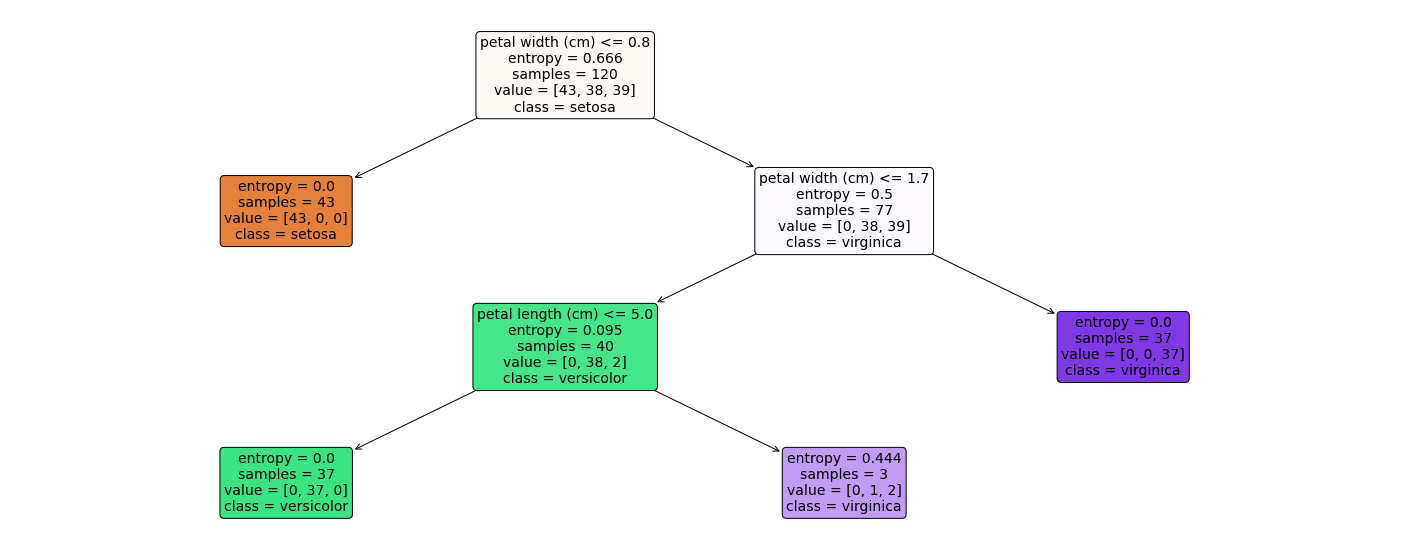

In [75]:
#Visualize our tree
#Value is the number of samples per split
#The left branch is True and the right branch is False
plt.figure(figsize=(25,10))
a = plot_tree(dt, 
              feature_names=feature_names, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)